In [7]:
import glob
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.warn('ignore')
lst = glob.glob('*서울시*.xlsx')
print(len(lst))
lst

12


['2018년 04월 서울시 차량통행속도.xlsx',
 '2018년 05월 서울시 차량통행속도.xlsx',
 '2018년 06월 서울시 차량통행속도.xlsx',
 '2018년 07월 서울시 차량통행속도.xlsx',
 '2018년 08월 서울시 차량통행속도.xlsx',
 '2018년 09월 서울시 차량통행속도.xlsx',
 '2018년 10월 서울시 차량통행속도.xlsx',
 '2018년 11월 서울시 차량통행속도.xlsx',
 '2018년 12월 서울시 차량통행속도.xlsx',
 '2019년 01월 서울시 차량통행속도.xlsx',
 '2019년 02월 서울시 차량통행속도.xlsx',
 '2019년 03월 서울시 차량통행속도.xlsx']

In [2]:
car12 = pd.read_excel('2018년 12월 서울시 차량통행속도.xlsx')
car12.drop(['도로명','시점명','종점명'],axis=1,inplace=True)
print(car12.columns)

Index(['일자', '요일', '링크아이디', '방향', '거리', '차선수', '기능유형구분', '도심/외곽구분', '권역구분',
       '01시', '02시', '03시', '04시', '05시', '06시', '07시', '08시', '09시', '10시',
       '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시',
       '21시', '22시', '23시', '24시'],
      dtype='object')


In [4]:
car = pd.melt(car12, id_vars=car12.columns[:9])
#bcar.columns = ['date','week','id','direction','distance','lane','type']
car.head()

,일자,요일,링크아이디,방향,거리,차선수,기능유형구분,도심/외곽구분,권역구분,variable,value
0,20181201,토,1080012200,상행,1179,1,보조간선도로,외곽,강북구,01시,NaN
1,20181201,토,1080012800,상행,352,1,보조간선도로,외곽,강북구,01시,NaN
2,20181201,토,1080012700,하행,354,2,보조간선도로,외곽,강북구,01시,NaN
3,20181201,토,1080012100,하행,1190,2,보조간선도로,외곽,강북구,01시,NaN
4,20181201,토,1230024700,상행,844,1,기타도로,외곽,송파구,01시,NaN


In [4]:
car12.isnull().sum()

일자            0
요일            0
링크아이디         0
방향            0
거리            0
차선수           0
기능유형구분        0
도심/외곽구분       0
권역구분          0
01시        5090
02시        4921
03시        5084
04시        5016
05시        5180
06시        5249
07시        5073
08시        4955
09시        4825
10시        4834
11시        9549
12시         169
13시         222
14시         133
15시         199
16시         290
17시         208
18시         158
19시         194
20시         166
21시         110
22시         248
23시         127
24시         355
dtype: int64

In [10]:
list(np.unique(car_drop_na['요일']))

['금', '목', '수', '월', '일', '토', '화']

In [5]:
car_drop_na = car.dropna(axis=0)
car_drop_na = car_drop_na.rename(columns = {'요일': 'week'})
car_drop_na['week'] = car_drop_na['week'].replace(list(np.unique(car_drop_na['week'])),['Fri','Thu','Wed','Mon','Sun','Sat','Tue'])
car_drop_na['variable'] = car_drop_na['variable'].apply(lambda x :int(x.replace('시',"")) )
print(car_drop_na.shape)
print('제거한 행의 갯수 :',car.shape[0]-car_drop_na.shape[0]) #6만개
car_drop_na.head(3)

(3456957, 11)
제거한 행의 갯수 : 62355


,일자,week,링크아이디,방향,거리,차선수,기능유형구분,도심/외곽구분,권역구분,variable,value
4717,20181202,Sun,1080012200,상행,1179,1,보조간선도로,외곽,강북구,1,45.23
4718,20181202,Sun,1080012800,상행,352,1,보조간선도로,외곽,강북구,1,16.06
4719,20181202,Sun,1080012700,하행,354,2,보조간선도로,외곽,강북구,1,25.75


In [20]:
print('### 차선수 value counts### \n',car_drop_na['차선수'].value_counts())
print('')
print('### 기능유형구분 value counts### \n',car_drop_na['기능유형구분'].value_counts())
print('')
print('### 도심/외곽구분 value counts### \n',car_drop_na['도심/외곽구분'].value_counts())

### 차선수 value counts### 
 2     1067217
3      962120
4      566361
1      428376
5      251638
0      112447
6       48304
7       17566
8        2196
11        732
Name: 차선수, dtype: int64

### 기능유형구분 value counts### 
 보조간선도로    1478043
주간선도로     1069860
기타도로       728573
도시고속도로     180481
Name: 기능유형구분, dtype: int64

### 도심/외곽구분 value counts### 
 외곽     3339855
도심권     117102
Name: 도심/외곽구분, dtype: int64


In [22]:
pd.DataFrame(car_drop_na.groupby(['variable','방향'])['value'].mean()).unstack()

value           
방향               상행         하행
variable                      
1         31.640455  31.824665
2         33.102185  33.285031
3         34.101910  34.271470
4         34.860799  35.010524
5         34.939035  35.108061
6         33.667216  33.680931
7         31.563656  31.355744
8         29.216654  28.941742
9         27.317546  26.888943
10        26.791927  26.250747
11        26.173117  25.688557
12        25.870394  25.505112
13        26.021797  25.798677
14        25.550257  25.401937
15        24.767807  24.575465
16        24.152150  23.945859
17        23.542508  23.375571
18        22.349955  22.255543
19        21.987820  21.906779
20        24.011042  24.014728
21        26.515162  26.681162
22        27.653162  27.801327
23        28.285034  28.486348
24        29.911697  30.118299

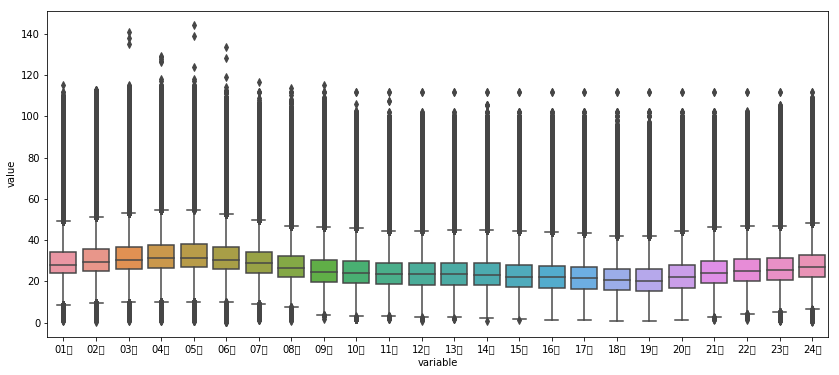

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
sns.boxplot(x=car_drop_na["variable"], y=car_drop_na["value"])

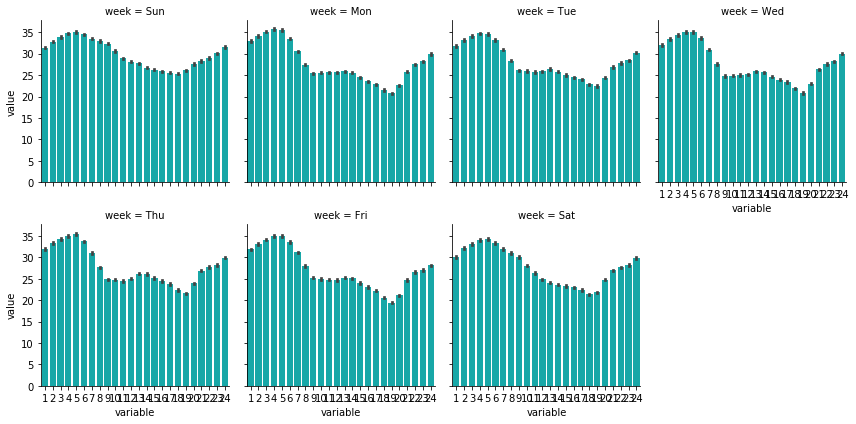

In [8]:
g = sns.FacetGrid(car_drop_na, col="week",col_wrap=4, height=3,)
g.map(sns.barplot, "variable", "value", color="c")

In [9]:
df = car_drop_na.loc[:,['week','variable','value']]
week_mean = df.groupby(['week'])['value'].mean()
week_mean = pd.DataFrame({'week':week_mean.index,'mean_value':list(week_mean)})
df = pd.merge(df,week_mean,on='week')
df['minus'] = df['value']-df['mean_value']
df.head()

,week,variable,value,mean_value,minus
0,Sun,1,45.23,29.957128,15.272872
1,Sun,1,16.06,29.957128,-13.897128
2,Sun,1,25.75,29.957128,-4.207128
3,Sun,1,49.49,29.957128,19.532872
4,Sun,1,21.51,29.957128,-8.447128


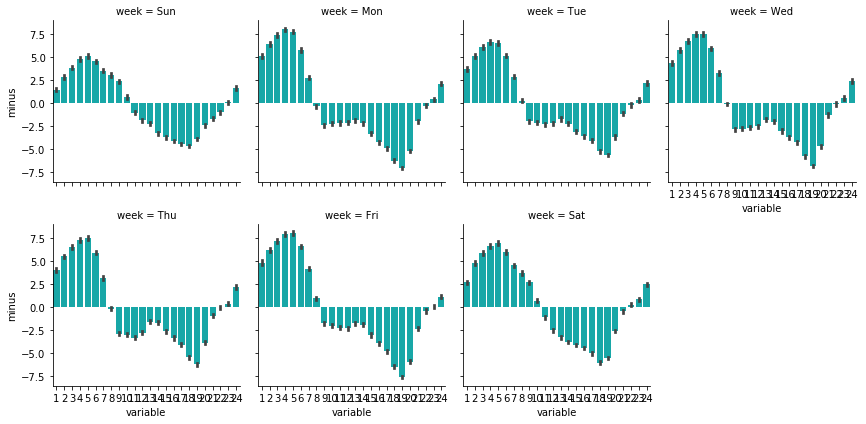

In [23]:
g = sns.FacetGrid(df, col="week",col_wrap=4, height=3,)
g.map(sns.barplot, "variable", "minus", color="c")

In [25]:
car_drop_na.head(2)

,일자,week,링크아이디,방향,거리,차선수,기능유형구분,도심/외곽구분,권역구분,variable,value
4717,20181202,Sun,1080012200,상행,1179,1,보조간선도로,외곽,강북구,1,45.23
4718,20181202,Sun,1080012800,상행,352,1,보조간선도로,외곽,강북구,1,16.06


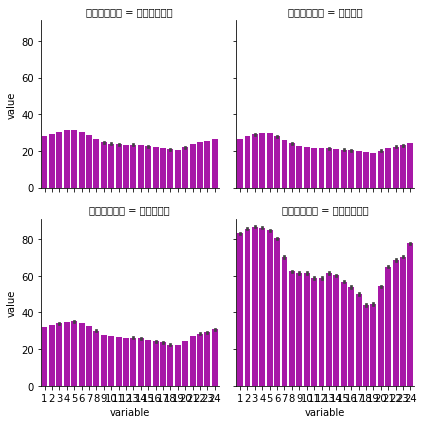

In [27]:
g = sns.FacetGrid(car_drop_na, col="기능유형구분",col_wrap=2, height=3,)
g.map(sns.barplot, "variable", "value", color="m")

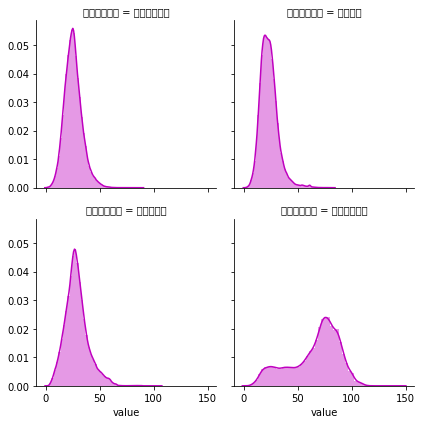

In [28]:
g = sns.FacetGrid(car_drop_na, col="기능유형구분",col_wrap=2, height=3,)
g.map(sns.distplot,"value", color="m")

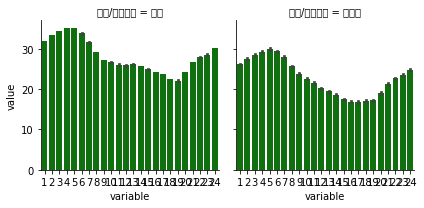

In [29]:
g = sns.FacetGrid(car_drop_na, col="도심/외곽구분",col_wrap=2, height=3,)
g.map(sns.barplot, "variable", "value", color="g")

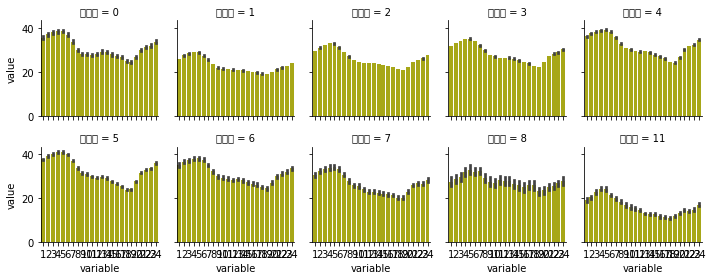

In [32]:
g = sns.FacetGrid(car_drop_na, col="차선수",col_wrap=5, height=2,)
g.map(sns.barplot, "variable", "value", color="y")

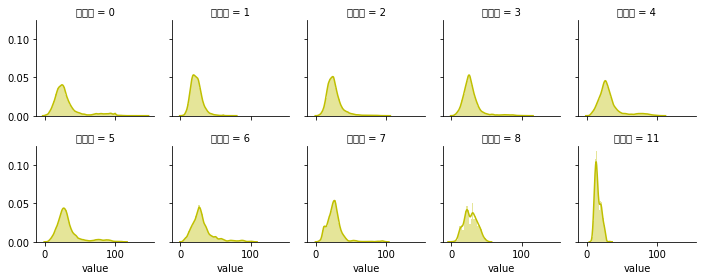

In [36]:
g = sns.FacetGrid(car_drop_na, col="차선수",col_wrap=5, height=2,)
g.map(sns.distplot,"value", color="y")

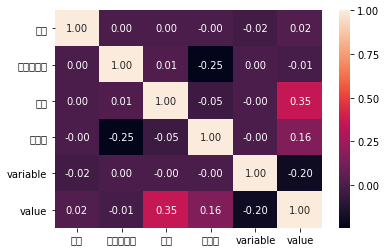

In [34]:
# Calculate correlations
corr = car_drop_na.corr() 
# Heatmap
sns.heatmap(corr, annot=True, fmt=".2f")

In [32]:
car_drop_na.sort_values(by='value',ascending=False).head()

,일자,요일,링크아이디,방향,거리,차선수,기능유형구분,도심/외곽구분,권역구분,variable,value
634044,20181211,화,2210000600,하행,1991,0,도시고속도로,외곽,광진구,05시,144.00
307650,20181204,화,2210000600,하행,1991,0,도시고속도로,외곽,광진구,03시,140.92
667162,20181218,화,2210000600,하행,1991,0,도시고속도로,외곽,광진구,05시,139.00
340768,20181211,화,2210000600,하행,1991,0,도시고속도로,외곽,광진구,03시,138.17
373886,20181218,화,2210000600,하행,1991,0,도시고속도로,외곽,광진구,03시,135.00


In [37]:
id_value = pd.DataFrame(car_drop_na.groupby(['링크아이디'])['value'].mean())
id_value.sort_values(by='value',ascending=False).head(5)

,value
링크아이디,
2060011401,96.281210
1140000100,94.090845
1140040500,92.654023
2040002902,91.655889
1180004100,91.164932


In [52]:
car_drop_na.loc[car_drop_na['링크아이디']==2060011401].sort_values(by='value').head(10)

,일자,요일,링크아이디,방향,거리,차선수,기능유형구분,도심/외곽구분,권역구분,variable,value
1991740,20181219,수,2060011401,상행,5260,0,도시고속도로,외곽,서초구,14시,80.83
2847913,20181214,금,2060011401,상행,5260,0,도시고속도로,외곽,서초구,20시,81.17
2701275,20181214,금,2060011401,상행,5260,0,도시고속도로,외곽,서초구,19시,81.58
1944429,20181209,일,2060011401,상행,5260,0,도시고속도로,외곽,서초구,14시,81.75
2209318,20181203,월,2060011401,상행,5260,0,도시고속도로,외곽,서초구,16시,82.67
2985088,20181212,수,2060011401,상행,5260,0,도시고속도로,외곽,서초구,21시,82.67
1670078,20181213,목,2060011401,상행,5260,0,도시고속도로,외곽,서초구,12시,82.75
2530981,20181209,일,2060011401,상행,5260,0,도시고속도로,외곽,서초구,18시,83.42
1083526,20181213,목,2060011401,상행,5260,0,도시고속도로,외곽,서초구,08시,83.50
2412730,20181215,토,2060011401,상행,5260,0,도시고속도로,외곽,서초구,17시,83.75


In [38]:
id_value.sort_values(by='value',ascending=False).tail(5)

,value
링크아이디,
1050017400,9.423241
1230034800,8.657090
1170021100,7.942814
1170001600,7.759156
1170021200,6.689836


In [53]:
car_drop_na.loc[car_drop_na['링크아이디']==1170021200].sort_values(by='value').head(10)

,일자,요일,링크아이디,방향,거리,차선수,기능유형구분,도심/외곽구분,권역구분,variable,value
878101,20181231,월,1170021200,하행,14,0,보조간선도로,외곽,금천구,06시,0.36
282087,20181229,토,1170021200,하행,14,0,보조간선도로,외곽,금천구,02시,0.38
740900,20181202,일,1170021200,하행,14,0,보조간선도로,외곽,금천구,06시,0.49
807134,20181216,일,1170021200,하행,14,0,보조간선도로,외곽,금천구,06시,0.49
840252,20181223,일,1170021200,하행,14,0,보조간선도로,외곽,금천구,06시,0.49
873370,20181230,일,1170021200,하행,14,0,보조간선도로,외곽,금천구,06시,0.49
774016,20181209,일,1170021200,하행,14,0,보조간선도로,외곽,금천구,06시,0.50
3422962,20181211,화,1170021200,하행,14,0,보조간선도로,외곽,금천구,24시,0.53
3427694,20181212,수,1170021200,하행,14,0,보조간선도로,외곽,금천구,24시,0.62
3517585,20181231,월,1170021200,하행,14,0,보조간선도로,외곽,금천구,24시,0.63


In [54]:
car_drop_na.loc[car_drop_na['링크아이디']==1170021200].sort_values(by='value',ascending=False).head(10)

,일자,요일,링크아이디,방향,거리,차선수,기능유형구분,도심/외곽구분,권역구분,variable,value
2699235,20181213,목,1170021200,하행,14,0,보조간선도로,외곽,금천구,19시,27.51
2656654,20181204,화,1170021200,하행,14,0,보조간선도로,외곽,금천구,19시,24.86
2855335,20181215,토,1170021200,하행,14,0,보조간선도로,외곽,금천구,20시,24.36
3030360,20181221,금,1170021200,하행,14,0,보조간선도로,외곽,금천구,21시,24.18
2798561,20181203,월,1170021200,하행,14,0,보조간선도로,외곽,금천구,20시,24.11
2297170,20181221,금,1170021200,하행,14,0,보조간선도로,외곽,금천구,16시,23.65
2623564,20181228,금,1170021200,하행,14,0,보조간선도로,외곽,금천구,18시,23.62
1251779,20181217,월,1170021200,하행,14,0,보조간선도로,외곽,금천구,09시,23.59
1190274,20181204,화,1170021200,하행,14,0,보조간선도로,외곽,금천구,09시,23.45
1762648,20181201,토,1170021200,하행,14,0,보조간선도로,외곽,금천구,13시,23.04
